**Victor Oliveira Corrieri de Macedo 14/0164961**

All the necessary python libraries to run this code are listed and imported below:

In [1]:
# change to "%matplotlib notebook" to get interative plot with zoom functionalities 
%matplotlib inline
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mat4py import loadmat

# Functions

All the implemented functions used are presented in this section.

In [2]:
def plotECGSignal(ecg_signal, fs, t0=0, delta_t=-1):
    """
    This function plots a signal for a given time interval.

    If no interval if given the whole signal will be plotted.

    If the interval exceeds the signal duration, 
    a warning will be printed in the terminal

    Parameters
    ----------
    ecg_signal : numpy array (signal_length,)
        The ecg signal as a row vector
    fs : integer
        The signal sampling rate in Hertz
    t0 : float
        The time to begin plotting in seconds
    delta_t : float
        The duration of the signal to be plotted in seconds
    """
    if delta_t == -1: # if delta is -1 plot till the end of the signal
        # set delta to the duration of the signal minus t0
        delta_t = len(ecg_signal)*(1/fs) - t0 
    # calculate duration from num of samples and sampling rate
    duration = len(ecg_signal)*(1/fs) 
    # get input required duration
    calc_duration = t0 + delta_t 
    # check if required duration exceeds the real duration
    if calc_duration > duration: 
        print("Exceeded signal duration")
        return
    # get equivalent sample for the initial time
    n0 = int(round(t0*fs)) 
    # get equivalent sample for the final time
    n1 = n0 + int(round(delta_t*fs)) 
    # produce time vector to show plot in sec
    t = np.linspace(0, len(ecg_signal)/fs, len(ecg_signal))
    # configure plot for the ECG signal
    plt.figure()
    plt.plot(t[n0:n1], ecg_signal[n0:n1])
    plt.ylabel("ECG amplitude")
    plt.xlabel("time (s)")
    plt.grid()
    plt.show()

In [3]:
def plotFFTSignal(signal, fs):
    """
    This function plots a signal power espectrum density (PSD)

    Parameters
    ----------
    esignal : numpy array (signal_length,)
        The signal as a row vector
    fs : integer
        The signal sampling rate in Hertz
    """
    N = len(signal) # store the number of sample in the signal
    # create a frequency vector to match the frequency index for each sample
    f = np.linspace(0, fs, N)
    # apply the fft transform to the signal normalized by the signal length
    signal_fft = np.fft.fft(signal)/N
    # calculate the PSB by elevating the signal magnitude to the second power
#     psd = np.power(np.abs(signal_fft), 2)
    signal_fft = np.abs(signal_fft)
    # configure plot
    plt.figure() 
    # plot only the positive frequencies
    plt.plot(f[:N // 2], signal_fft[:N // 2])
    plt.xlabel("frequency (Hz)")
    plt.grid()
    plt.show()

# ECG Analysis

In this section the ECG sample signal is analyzed to identify the Q, R and S locations and later segment the QRS complex.

## Raw ECG plot

The signal used for the experiment is the first sample named "ecg01.mat" which has a sampling frequency fs of 125 Hz.

In [8]:
# load signal
# data_input = loadmat('sinais_ecg/ecg01.mat') 
data_input = loadmat('sinais_prova_1/ecg_1.mat') 
# get only the x values and transform in a row vector
data_ecg = np.array(data_input['x'])[:, 0]
fs = 360 # set sampling rate
data_ecg = data_ecg - np.mean(data_ecg)

In order to plot in a visible scale, only an interval of a couple ECG cycles are displayed. To control the region to be displayed the starting point t0 can be defined, along with lenght in seconds desired.

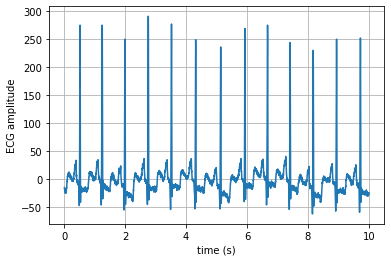

In [9]:
plotECGSignal(data_ecg, fs)

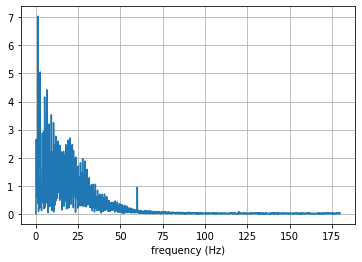

In [10]:
plotFFTSignal(data_ecg, fs)

Similiarly, the QRS segments PSD's are also mainly below 10 Hz, but now, because de signal has less points and the FFT was calculated with same amount of points, the PSD appeared in a lower frequency resolution.

## Individual QRS segments

To check the power distribution over the frequencies for the individual QRS segments we plotted all their PSD simultaneously below. Similiar to the original the main part of the signal is located below 10 Hz, but in this case, because the FFT was calculated with the same number of points as the input signal, its frequency resolution was lower, making it harder to distinct between the lower frequencies.

In [ ]:
plotAllPSDSignals(QRS_cplx, fs)

## QRS Concatenated

Then, for the signal with all the QRS segments concatenated, the PSD showed a similiar power distribution as the original, but with less peaks and the density more spreaded out in the frequencies. This should be due to the high frequencies introduced by each segment window transition.

In [ ]:
plotPSDSignal(QRS_cplx_conc, fs)

To better visualize the differences between the original and concatenated signals, we plotted them together below. In this case, the graph shows that the mean peaks changed by eliminating the regions without a QRS segment.

In [ ]:
plotAllPSDSignals([data_ecg, QRS_cplx_conc], fs)

## QRS with Zeros

Finally, the signal where values were substituted with zeros in the regions outside the QRS segments showed a power distribution if closer to the original, but with more evenly distributing of power through the peaks in the lower frequencies, which consequently reduced the max peaks amplitude.

In [ ]:
plotPSDSignal(QRS_cplx_zeros, fs)

To check if the peaks location were mantained between the original signal and the signal with zero we plotted both simultaneously. As we can see, the peaks seem to match and only the amplitude changed, which makes sense since we kept most of the signal content intact.

In [ ]:
plotAllPSDSignals([data_ecg, QRS_cplx_zeros], fs)